In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from  sklearn import  linear_model

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
ss = ShuffleSplit(n_splits=1,
                  train_size=0.5,
                  test_size=0.5,
                  random_state=0)

In [4]:
clf = linear_model.LogisticRegression(solver='liblinear')

In [5]:
train_index, test_index = next(ss.split(X))
X_train, X_test = X[train_index],X[test_index]
y_train, y_test = y[train_index],y[test_index]

In [6]:
clf.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [7]:
print(clf.score(X_train,y_train))

0.92


In [8]:
print(clf.score(X_test,y_test))

0.84


In [11]:
ss = ShuffleSplit(n_splits=10, #分割を十個生成
                  train_size=0.5,
                  test_size=0.5,
                  random_state=0)

scores = []
for train_index,test_index in ss.split(X):
    #forが10回る
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    scores.append(score)

scores = np.array(scores)
print(scores)

[0.84       0.93333333 0.90666667 1.         0.90666667 0.93333333
 0.94666667 1.         0.90666667 0.88      ]


In [12]:
scores.mean()
#平均

0.9253333333333333

In [13]:
scores.std()
#標準偏差

0.04702717890279574

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline



In [27]:
train_sizes = np.arange(0.1,1.0,0.1)

In [28]:
all_mean = []
all_std = []

for train_size in train_sizes:
    ss = ShuffleSplit(n_splits=100, #分割を十個生成
                      train_size=train_size,
                      test_size=1-train_size,
                      random_state=0)
    scores = []

    for train_index,test_index in ss.split(X):
        #forが10回る
        X_train,X_test=X[train_index],X[test_index]
        y_train,y_test=y[train_index],y[test_index]
        
        clf.fit(X_train,y_train)
        score = clf.score(X_test,y_test)
        scores.append(score)
    
    scores = np.array(scores)
    #print(scores)
    
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, 
                                                            scores.mean() * 100, 
                                                            scores.std()  * 100))
    
    all_mean.append(scores.mean()*100)
    all_std.append(scores.std()*100)

train_size 10%: 75.24 +/- 10.94 %
train_size 20%: 84.17 +/- 10.09 %
train_size 30%: 89.39 +/- 6.31 %
train_size 40%: 91.91 +/- 4.60 %
train_size 50%: 93.05 +/- 3.84 %
train_size 60%: 94.17 +/- 3.32 %
train_size 70%: 94.73 +/- 3.59 %
train_size 80%: 95.80 +/- 3.73 %
train_size 90%: 96.07 +/- 5.42 %


Text(0.5, 1.0, 'Average of 10 hold-out test for different training size')

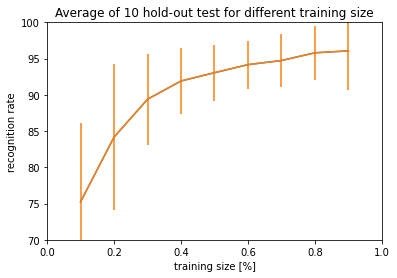

In [37]:
plt.plot(train_sizes,all_mean)
plt.ylim(70,100)
plt.xlim(0,1)
plt.errorbar(train_sizes,all_mean,yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out test for different training size")